Import the 🦸🏾‍♀️"Avengers"🦹🏻 data from the [FiveThirtyEight data repository on GitHub](https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv).

In [6]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [10]:
avengers = read_csv(
    'https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv',
    col_types = cols()
)

avengers |> head(5)

URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,⋯,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NA,Sep-63,1963,52,Full,⋯,NO,NA,NA,NA,NA,NA,NA,NA,NA,Merged with Ultron in Rage of Ultron Vol. 1. A funeral was held.
http://marvel.wikia.com/Janet_van_Dyne_(Earth-616),Janet van Dyne,1165,YES,FEMALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,Dies in Secret Invasion V1:I8. Actually was sent tto Microverse later recovered
http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,"Death: ""Later while under the influence of Immortus Stark committed a number of horrible acts and was killed.' This set up young Tony. Franklin Richards later brought him back"
http://marvel.wikia.com/Robert_Bruce_Banner_(Earth-616),Robert Bruce Banner,2089,YES,MALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,"Dies in Ghosts of the Future arc. However ""he had actually used a hidden Pantheon base to survive"""
http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NA,Sep-63,1963,52,Full,⋯,YES,YES,NO,NA,NA,NA,NA,NA,NA,Dies in Fear Itself brought back because that's kind of the whole point. Second death in Time Runs Out has not yet returned


Make an ECDF plot 📊 of `Appearances`.

(❗️Hint: combine `arrange`, `mutate` and `row_number`/`rank` to produce a new column to encode with y-position.)

In [20]:
avengers |> 
    select('Name/Alias', Appearances) |>
    arrange(Appearances) |> 
    mutate (rk = row_number() / n()) |> tail()

Name/Alias,Appearances,rk
<chr>,<dbl>,<dbl>
Benjamin Jacob Grimm,2305,0.9710983
Thor Odinson,2402,0.9768786
"Anthony Edward ""Tony"" Stark",3068,0.9826590
"James ""Logan"" Howlett",3130,0.9884393
Steven Rogers,3458,0.9942197
Peter Benjamin Parker,4333,1.0000000


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'rk' not found

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(captu

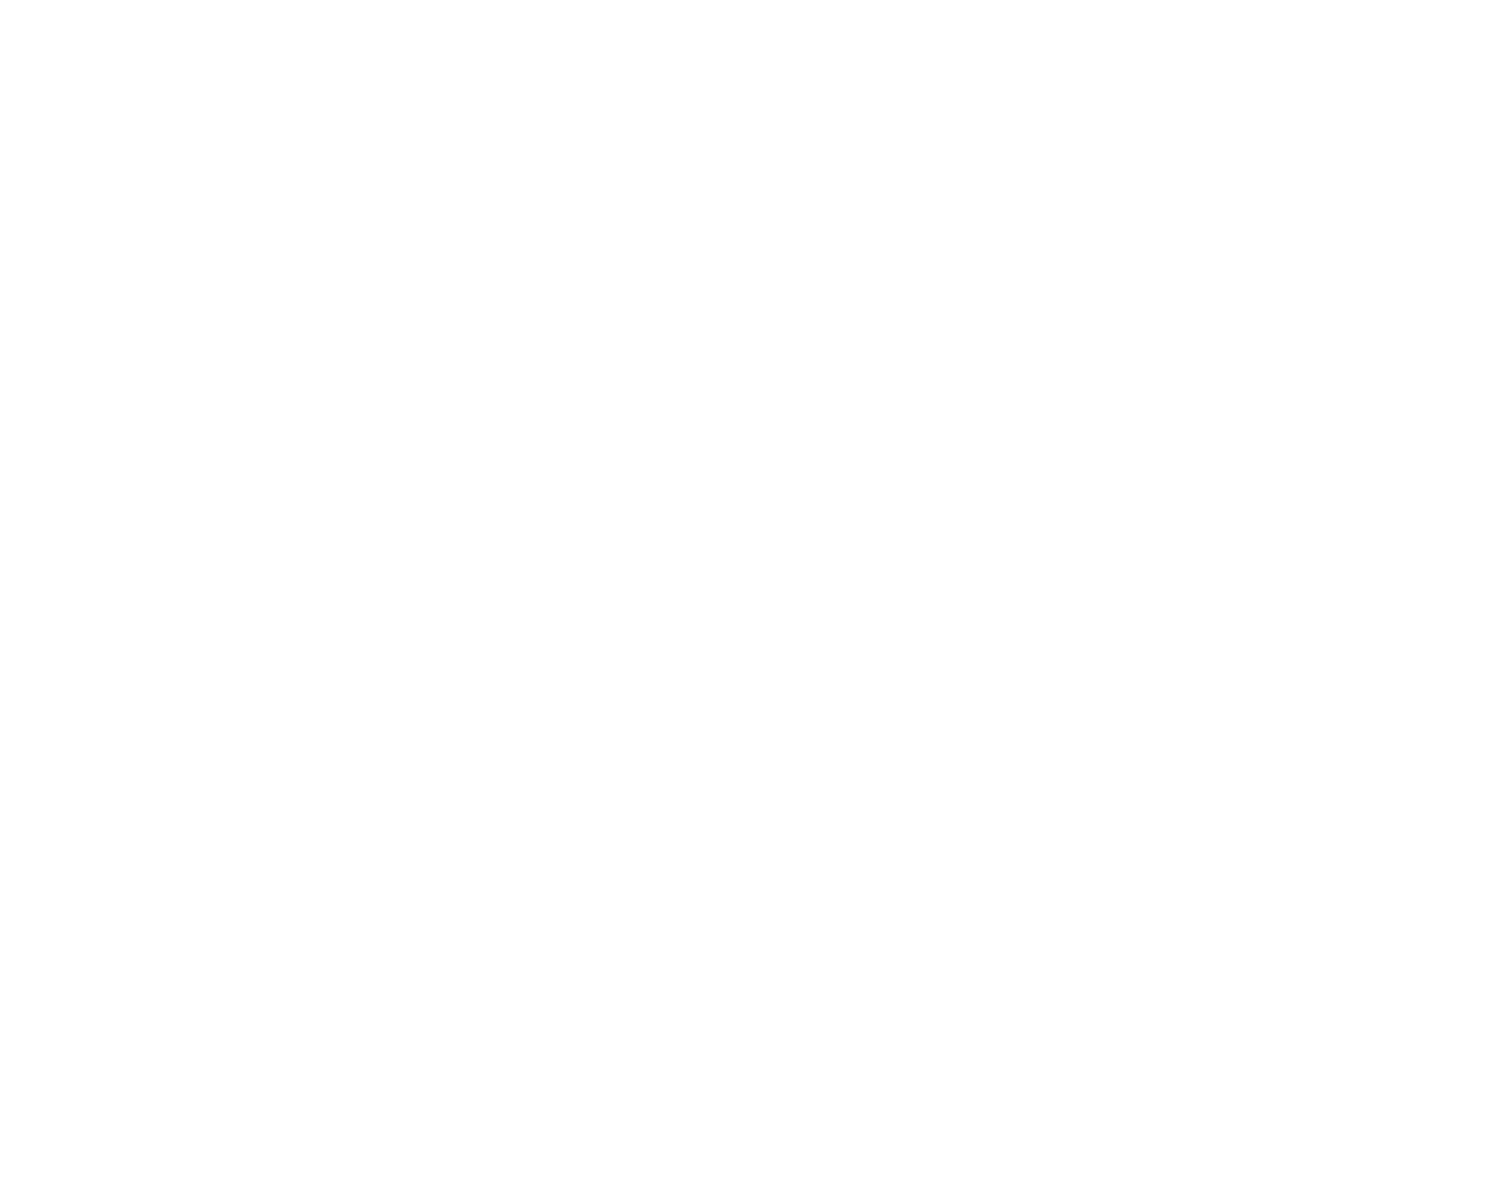

In [21]:
p = ggplot(avengers, aes(x = Appearances, y = rk)) + geom_point()
           
p